In [1]:
import logging
import numpy as np
import pandas as pd

from src.datasets import load_breast_cancer_dataset
from src.shadow_learn import ShadowedSetEstimator
from src.model_selection import grid_search, score_zoom
from src.utils import create_logfile, log_last_execution, plot_shadowed_set

In [2]:
log = True
create_logfile('grid_search_two_phases_single_C_breast_cancer', 
               'Started Grid Search for Gurobi Two Phases Models on breast cancer dataset', log)

In [3]:
labels = ['benign', 'malignant']
label_colors = ['cornflowerblue', 'crimson']

contourf_colors = ['white', 'pink', 'palevioletred', 'red']

In [4]:
estimator = ShadowedSetEstimator(solver='gurobi-two-phases-single-C')

## Malignant conservative metric GridSearch

In [5]:
dataset_loader = lambda: load_breast_cancer_dataset(d=2, target='malignant')

In [6]:
C_range = np.concatenate((np.logspace(-1, 0, 5), []))
sigma_range = np.concatenate((np.logspace(-1, 1, 5), [0.8]))
param_grid = {'C': C_range, 'sigma': sigma_range}

In [7]:
gs_res = grid_search(dataset_loader, estimator, 'conservative', param_grid, scaled=True, log=log)

***** Split n. 0
Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   24.7s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  1.6min


Using license file C:\Users\gabri\gurobi.lic
Academic license - for non-commercial use only


[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:  2.5min finished


mean_fit_time                                        0.89041
std_fit_time                                      0.00524587
mean_score_time                                    0.0485233
std_score_time                                   0.000843747
param_C                                             0.177828
param_sigma                                              0.8
params               {'C': 0.1778279410038923, 'sigma': 0.8}
split0_test_score                                        0.6
split1_test_score                                      0.525
split2_test_score                                      0.675
split3_test_score                                       0.85
split4_test_score                                      0.875
split5_test_score                                      0.825
split6_test_score                                        0.8
split7_test_score                                      0.675
split8_test_score                                   0.897436
split9_test_score       

100%|##########| 22500/22500 [00:31<00:00, 708.24it/s]


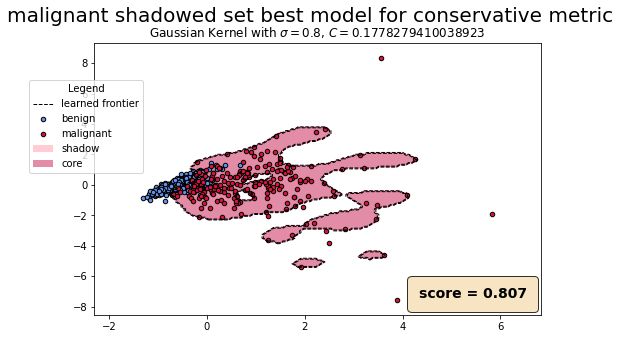

In [8]:
plot_shadowed_set(gs_res, labels, label_colors, contourf_colors, simplified=True)

## Malignant conservative metric score charts

In [9]:
C_range = np.linspace(0.2, 5, 5)
sigma_range = np.linspace(0.1, 2, 10)
param_grid = {'C': C_range, 'sigma': sigma_range}

Fitting 10 folds for each of 66 candidates, totalling 660 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   23.2s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  1.6min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  3.6min
[Parallel(n_jobs=2)]: Done 660 out of 660 | elapsed:  5.4min finished


mean_fit_time                                       0.894823
std_fit_time                                      0.00587095
mean_score_time                                    0.0479553
std_score_time                                   0.000632206
param_C                                             0.177828
param_sigma                                              0.8
params               {'C': 0.1778279410038923, 'sigma': 0.8}
split0_test_score                                        0.6
split1_test_score                                      0.525
split2_test_score                                      0.675
split3_test_score                                       0.85
split4_test_score                                      0.875
split5_test_score                                      0.825
split6_test_score                                        0.8
split7_test_score                                      0.675
split8_test_score                                   0.897436
split9_test_score       

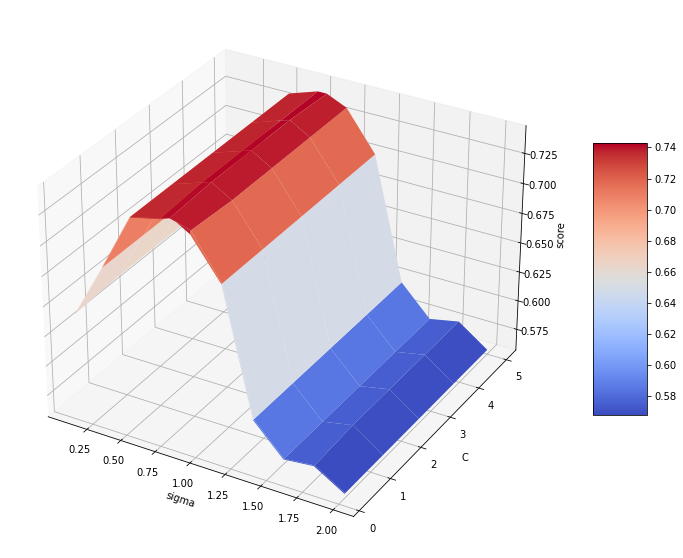

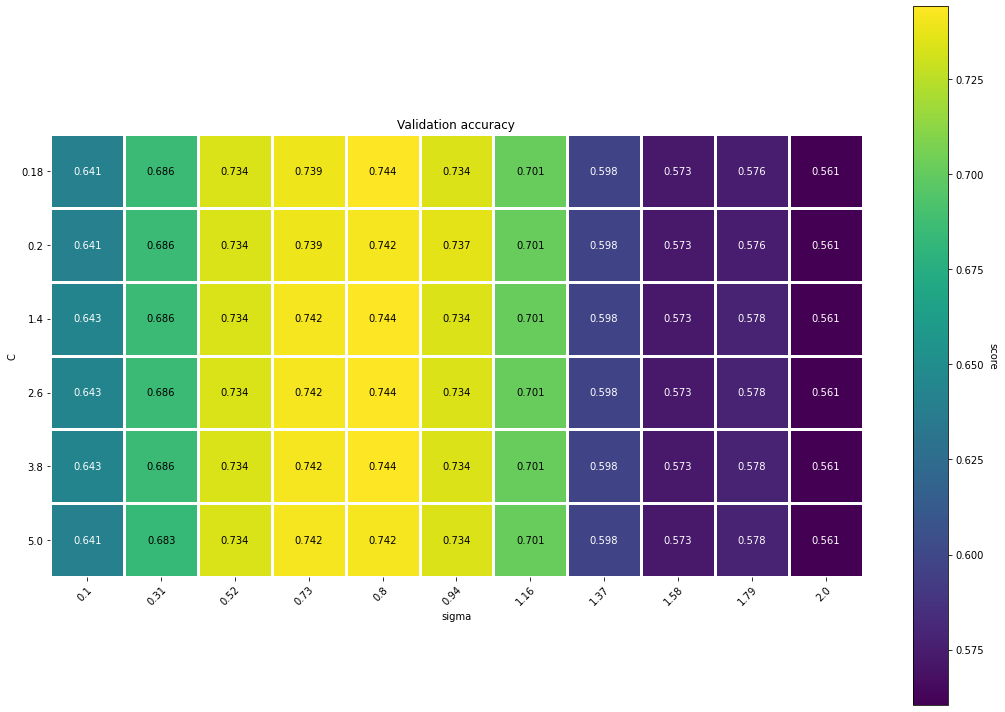

In [10]:
new_gs = score_zoom(gs_res, param_grid=param_grid, log=log)

## Malignant non-conservative metric GridSearch

In [11]:
C_range = np.concatenate((np.logspace(-1, 0, 5), []))
sigma_range = np.concatenate((np.logspace(-1, 1, 5), [0.8]))
param_grid = {'C': C_range, 'sigma': sigma_range}

In [12]:
gs_res = grid_search(dataset_loader, estimator, 'non-conservative', param_grid, scaled=True, log=log)

***** Split n. 0
Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   22.6s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  1.6min
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:  2.4min finished


mean_fit_time                                       0.888085
std_fit_time                                       0.0106946
mean_score_time                                    0.0485501
std_score_time                                   0.000489454
param_C                                             0.177828
param_sigma                                              0.8
params               {'C': 0.1778279410038923, 'sigma': 0.8}
split0_test_score                                        0.6
split1_test_score                                      0.525
split2_test_score                                      0.675
split3_test_score                                       0.85
split4_test_score                                      0.875
split5_test_score                                      0.825
split6_test_score                                        0.8
split7_test_score                                      0.675
split8_test_score                                   0.897436
split9_test_score       

100%|##########| 22500/22500 [00:33<00:00, 679.11it/s]


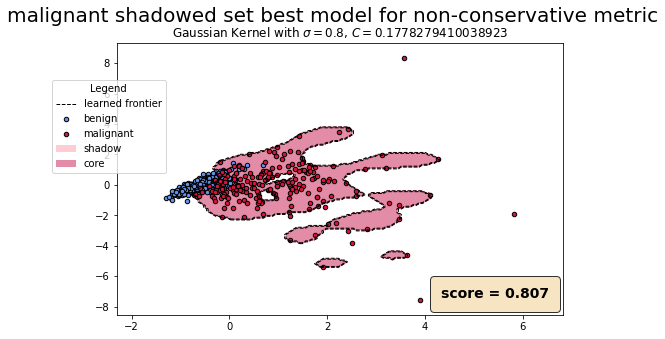

In [13]:
plot_shadowed_set(gs_res, labels, label_colors, contourf_colors, simplified=True)

## Malignant non-conservative metric score charts

In [14]:
C_range = np.linspace(0.2, 30, 5)
sigma_range = np.linspace(0.5, 10, 10)
param_grid = {'C': C_range, 'sigma': sigma_range}

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 66 candidates, totalling 660 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   21.8s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  1.5min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  3.5min
[Parallel(n_jobs=2)]: Done 660 out of 660 | elapsed:  5.1min finished


mean_fit_time                                       0.890223
std_fit_time                                      0.00704215
mean_score_time                                    0.0479043
std_score_time                                   0.000776255
param_C                                             0.177828
param_sigma                                              0.8
params               {'C': 0.1778279410038923, 'sigma': 0.8}
split0_test_score                                        0.6
split1_test_score                                      0.525
split2_test_score                                      0.675
split3_test_score                                       0.85
split4_test_score                                      0.875
split5_test_score                                      0.825
split6_test_score                                        0.8
split7_test_score                                      0.675
split8_test_score                                   0.897436
split9_test_score       

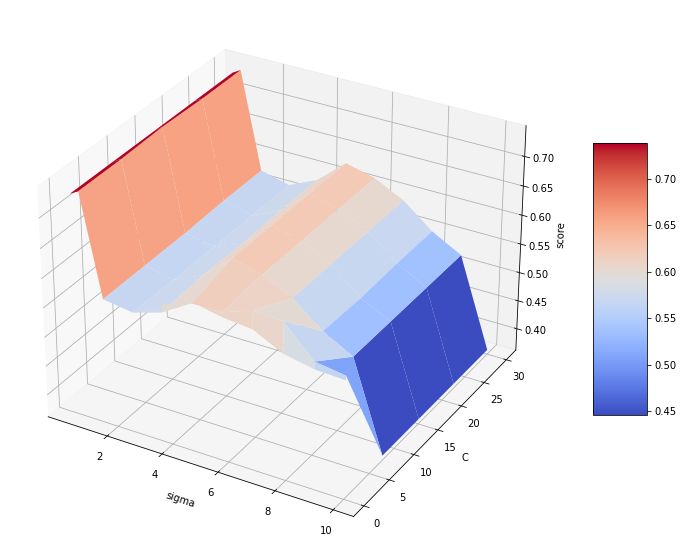

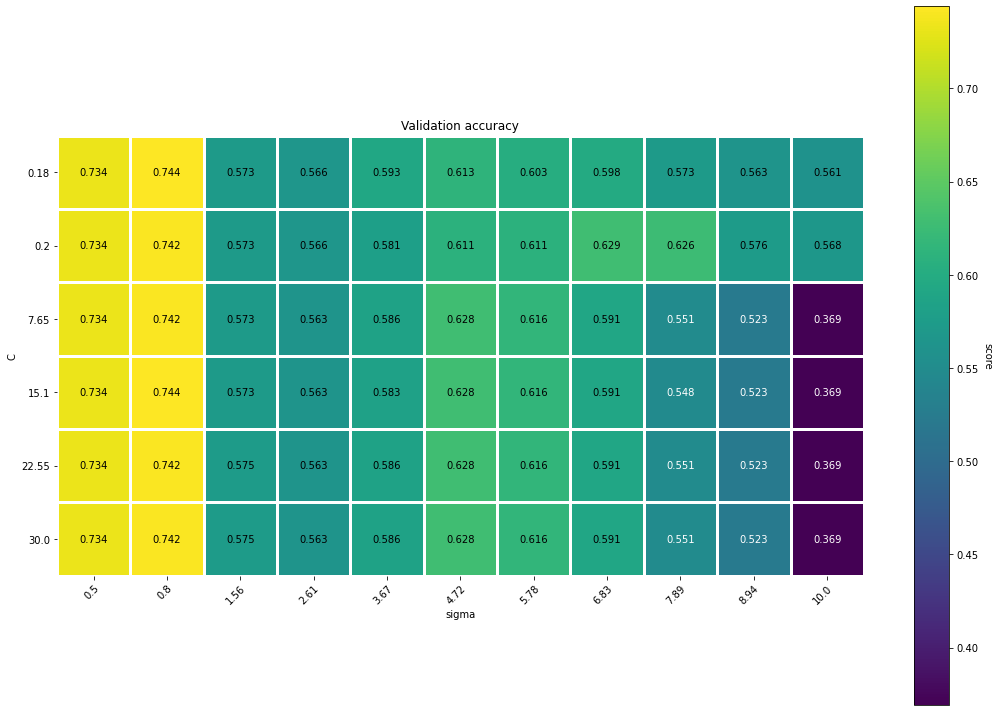

In [15]:
new_gs = score_zoom(gs_res, param_grid=param_grid, log=log)

## Benign conservative metric GridSearch

In [16]:
dataset_loader = lambda: load_breast_cancer_dataset(d=2, target='benign')
contourf_colors = ['white', 'lightskyblue', 'steelblue', 'red']

In [17]:
C_range = np.concatenate((np.logspace(-1, 0, 5), [0.316228]))
sigma_range = np.concatenate((np.logspace(-1, 1, 5), [0.8]))
param_grid = {'C': C_range, 'sigma': sigma_range}

In [18]:
gs_res = grid_search(dataset_loader, estimator, 'conservative', param_grid, scaled=True, log=log)

***** Split n. 0
Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   46.9s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  3.4min
[Parallel(n_jobs=2)]: Done 360 out of 360 | elapsed:  6.1min finished


mean_fit_time                                         1.89456
std_fit_time                                        0.0288414
mean_score_time                                     0.0822383
std_score_time                                     0.00335321
param_C                                              0.316228
param_sigma                                               0.8
params               {'C': 0.31622776601683794, 'sigma': 0.8}
split0_test_score                                         0.9
split1_test_score                                           1
split2_test_score                                       0.925
split3_test_score                                        0.95
split4_test_score                                        0.95
split5_test_score                                       0.925
split6_test_score                                       0.825
split7_test_score                                         0.9
split8_test_score                                    0.923077
split9_t

100%|##########| 22500/22500 [00:54<00:00, 412.97it/s]


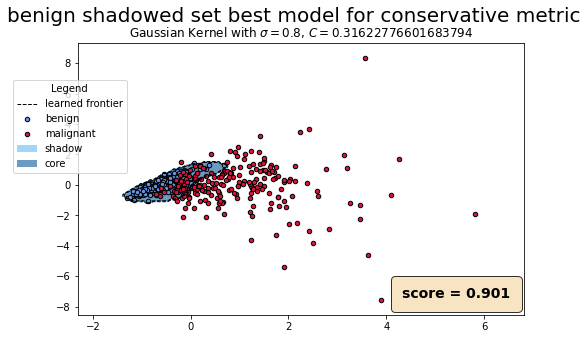

In [19]:
plot_shadowed_set(gs_res, labels, label_colors, contourf_colors, simplified=True)

## Benign conservative metric score charts

In [20]:
C_range = np.linspace(0.2, 10, 5)
sigma_range = np.linspace(0.2, 5, 10)
param_grid = {'C': C_range, 'sigma': sigma_range}

Fitting 10 folds for each of 66 candidates, totalling 660 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   46.5s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  3.3min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  7.5min
[Parallel(n_jobs=2)]: Done 660 out of 660 | elapsed: 11.0min finished


mean_fit_time                                         1.87165
std_fit_time                                        0.0135632
mean_score_time                                      0.080921
std_score_time                                      0.0010335
param_C                                              0.316228
param_sigma                                               0.8
params               {'C': 0.31622776601683794, 'sigma': 0.8}
split0_test_score                                         0.9
split1_test_score                                           1
split2_test_score                                       0.925
split3_test_score                                        0.95
split4_test_score                                        0.95
split5_test_score                                       0.925
split6_test_score                                       0.825
split7_test_score                                         0.9
split8_test_score                                    0.923077
split9_t

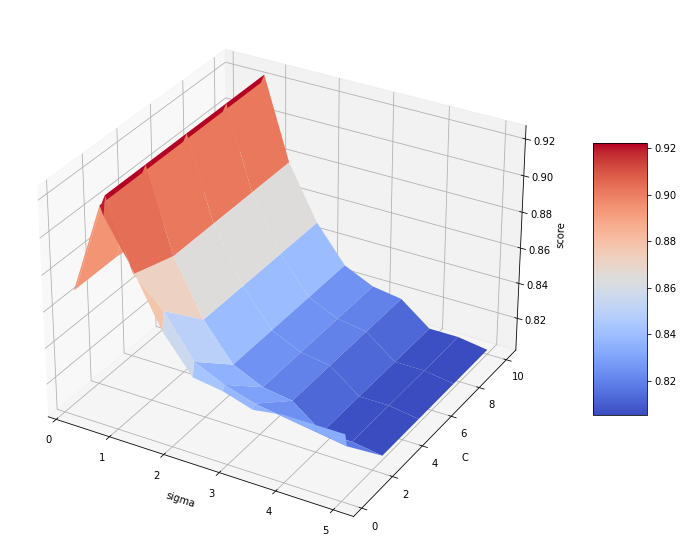

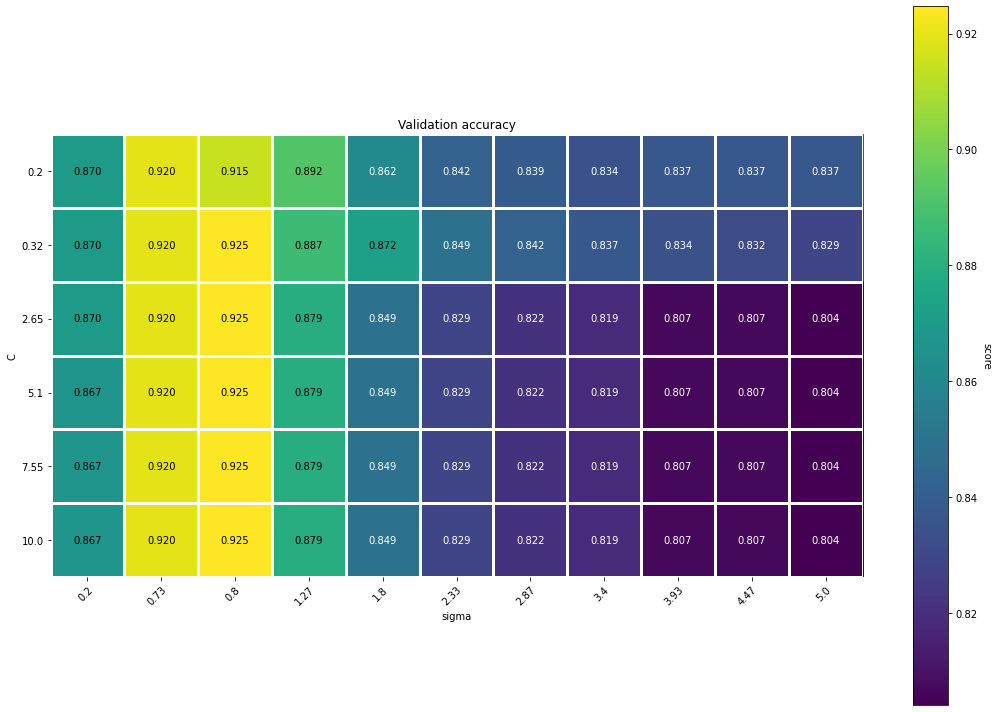

In [21]:
new_gs = score_zoom(gs_res, param_grid=param_grid, log=log)

## Benign non-conservative metric GridSearch

In [22]:
C_range = np.concatenate((np.logspace(-1, 0, 5), [0.1]))
sigma_range = np.concatenate((np.logspace(-1, 1, 5), [0.8, 3.16228]))
param_grid = {'C': C_range, 'sigma': sigma_range}

In [23]:
gs_res = grid_search(dataset_loader, estimator, 'non-conservative', param_grid, scaled=True, log=log)

***** Split n. 0
Fitting 10 folds for each of 42 candidates, totalling 420 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   46.7s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  3.3min
[Parallel(n_jobs=2)]: Done 420 out of 420 | elapsed:  7.1min finished


mean_fit_time                                         1.86998
std_fit_time                                       0.00769928
mean_score_time                                     0.0810126
std_score_time                                     0.00126259
param_C                                              0.316228
param_sigma                                               0.8
params               {'C': 0.31622776601683794, 'sigma': 0.8}
split0_test_score                                         0.9
split1_test_score                                           1
split2_test_score                                       0.925
split3_test_score                                        0.95
split4_test_score                                        0.95
split5_test_score                                       0.925
split6_test_score                                       0.825
split7_test_score                                         0.9
split8_test_score                                    0.923077
split9_t

100%|##########| 22500/22500 [00:56<00:00, 397.50it/s]


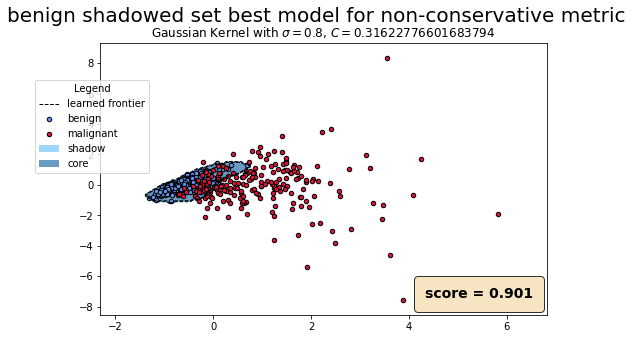

In [24]:
plot_shadowed_set(gs_res, labels, label_colors, contourf_colors, simplified=True)

## Benign non-conservative metric score charts

In [25]:
C_range = np.linspace(0.2, 30, 10)
sigma_range = np.linspace(0.5, 10, 10)
param_grid = {'C': C_range, 'sigma': sigma_range}

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 121 candidates, totalling 1210 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   45.8s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  3.3min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  7.4min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 13.2min
[Parallel(n_jobs=2)]: Done 1210 out of 1210 | elapsed: 20.1min finished


mean_fit_time                                          1.8726
std_fit_time                                        0.0131967
mean_score_time                                     0.0808518
std_score_time                                     0.00135848
param_C                                              0.316228
param_sigma                                               0.8
params               {'C': 0.31622776601683794, 'sigma': 0.8}
split0_test_score                                         0.9
split1_test_score                                           1
split2_test_score                                       0.925
split3_test_score                                        0.95
split4_test_score                                        0.95
split5_test_score                                       0.925
split6_test_score                                       0.825
split7_test_score                                         0.9
split8_test_score                                    0.923077
split9_t

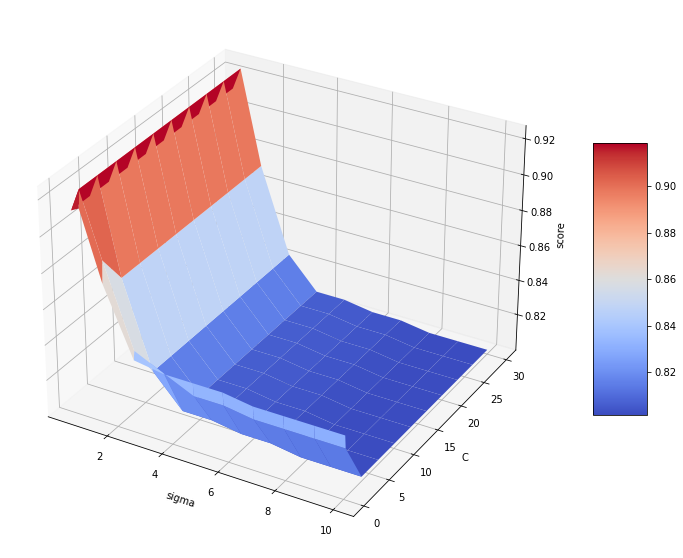

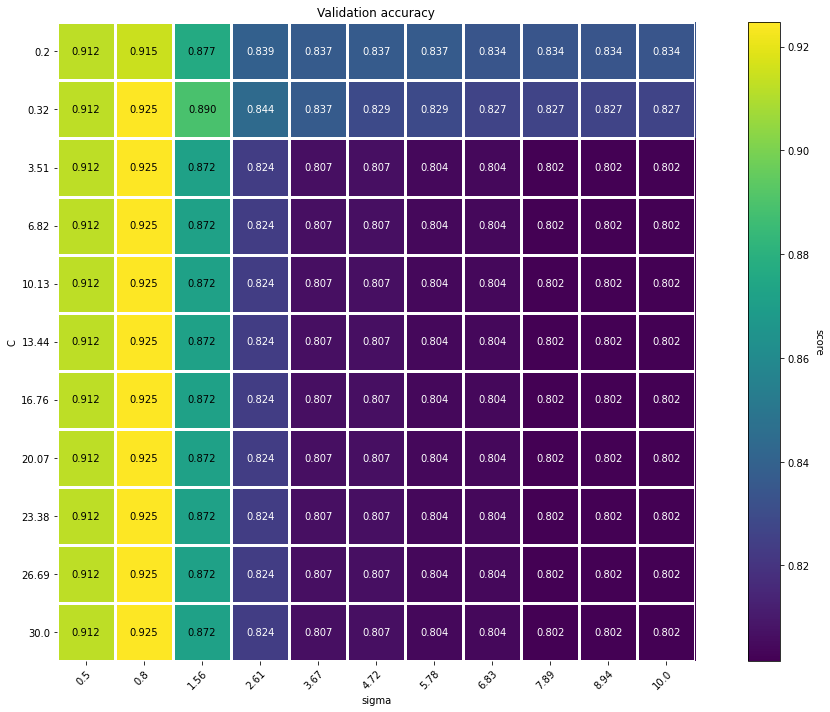

In [26]:
new_gs = score_zoom(gs_res, param_grid=param_grid, log=log)

In [29]:
log_last_execution('Finished Grid Search for Gurobi Two Phases Models on breast cancer dataset', log=log)

Last complete execution: 2020-11-11 00:32:55
